In [1]:
# Sales Prediction 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Read the future Data File
future = pd.read_csv('/Users/sachinim/Documents/Projects/Sales Prediction Project/Sales Prediction Dataset/Future50.csv')
future.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [3]:
# Seperate State and City into Two variables (Location Coluumn)

future['Location'] = future.Location.apply(lambda x: x.split(', '))
future['State'] = future.Location.str.slice(1,9).sum()
future['City'] = future.Location.str.slice(0,1).sum()
future['State'] = future.State.apply(lambda x: x.replace(" ", ""))
future['City'] = future.City.apply(lambda x: x.replace(" ", ""))
future.drop('Location', axis=1, inplace=True)
future.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,State,City
0,1,Evergreens,24,130.5%,26,116.7%,1150,No,Wash.,Seattle
1,2,Clean Juice,44,121.9%,105,94.4%,560,Yes,N.C.,Charlotte
2,3,Slapfish,21,81.0%,21,90.9%,1370,Yes,Calif.,HuntingtonBeach
3,4,Clean Eatz,25,79.7%,46,58.6%,685,Yes,N.C.,Wilmington
4,5,Pokeworks,49,77.1%,50,56.3%,1210,Yes,Calif.,Irvine


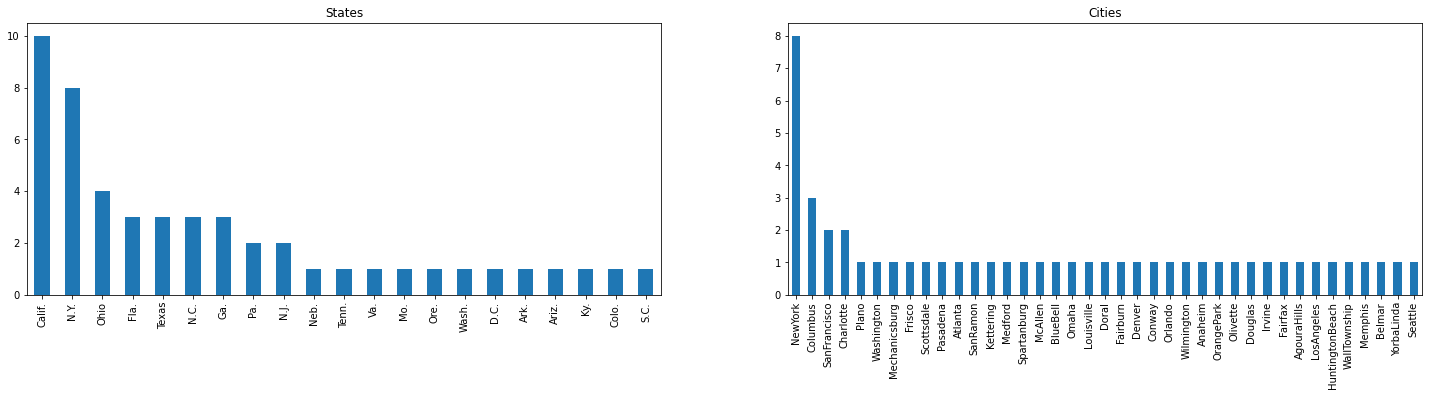

In [4]:
# Analyse State and City

plt.subplots(figsize=(25,5))

plt.subplot(1,2,2)
future['City'].value_counts().plot(kind='bar').set_title('Cities')

plt.subplot(1,2,1)
future['State'].value_counts().plot(kind='bar').set_title('States')

plt.show()

In [5]:
colors = []

for i in future.groupby('State').Sales.sum():
  if i > future.groupby('State').Sales.sum().mean():
    colors.append('lightgreen')
  else:
    colors.append('lightblue')
    
colors2 = []

for i in future.groupby('City').Sales.sum():
  if i > future.groupby('City').Sales.sum().mean():
    colors2.append('lightgreen')
  else:
    colors2.append('lightblue')

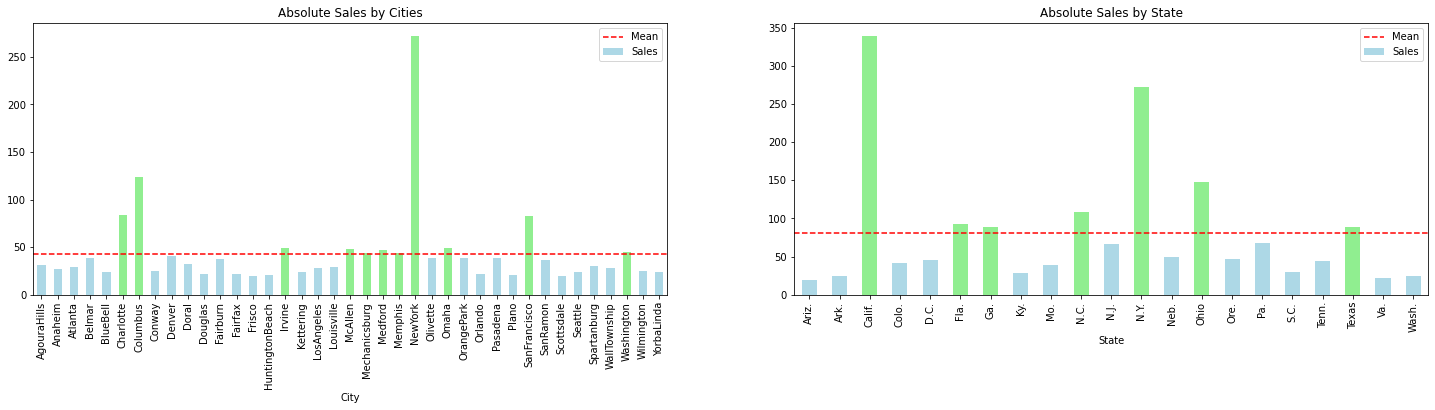

In [6]:
plt.subplots(figsize=(25,5))

plt.subplot(1,2,1)
future.groupby('City').Sales.sum().plot(kind='bar', color=colors2, title='Absolute Sales by Cities')
plt.axhline(future.groupby('City').Sales.sum().mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.subplot(1,2,2)
future.groupby('State').Sales.sum().plot(kind='bar', color=colors, title='Absolute Sales by State')
plt.axhline(future.groupby('State').Sales.sum().mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.show()

In [7]:
colors3 = []

for i in future.groupby('State').Sales.mean():
  if i > future.groupby('State').Sales.mean().mean():
    colors3.append('lightgreen')
  else:
    colors3.append('lightblue')
    
colors4 = []

for i in future.groupby('City').Sales.mean():
  if i > future.groupby('City').Sales.mean().mean():
    colors4.append('lightgreen')
  else:
    colors4.append('lightblue')

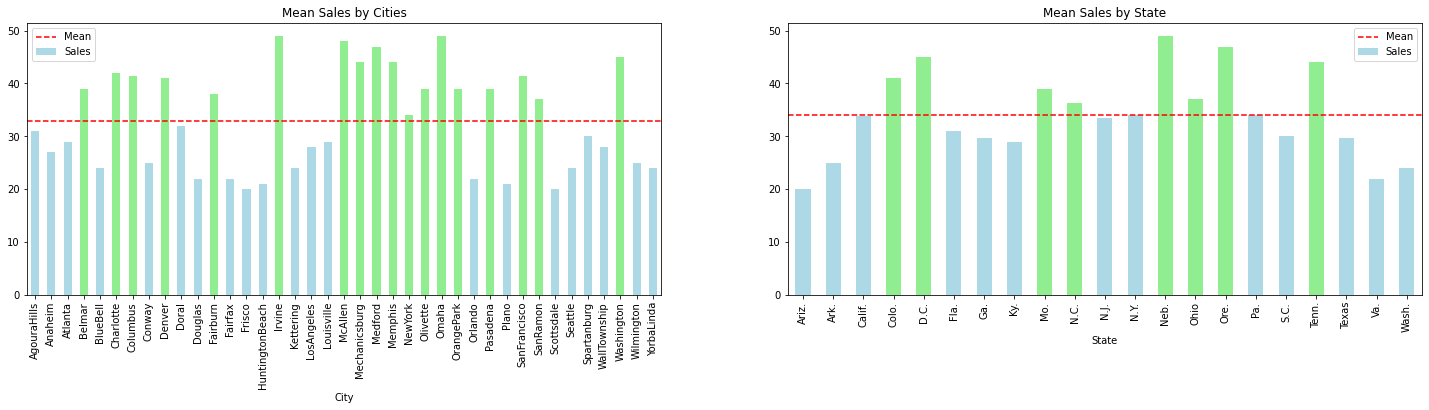

In [8]:
plt.subplots(figsize=(25,5))

plt.subplot(1,2,1)
future.groupby('City').Sales.mean().plot(kind='bar', color=colors4, title='Mean Sales by Cities')
plt.axhline(future.groupby('City').Sales.mean().mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.subplot(1,2,2)
future.groupby('State').Sales.mean().plot(kind='bar', color=colors3, title='Mean Sales by State')
plt.axhline(future.groupby('State').Sales.mean().mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
future['Franchising'] = encoder.fit_transform(future['Franchising'])

future['YOY_Sales'] = future['YOY_Sales'].apply(lambda x: x.replace("%",""))
future['YOY_Sales'] = future['YOY_Sales'].astype('float')
future['YOY_Units'] = future['YOY_Units'].apply(lambda x: x.replace("%",""))
future['YOY_Units'] = future['YOY_Units'].astype('float')

future.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,State,City
0,1,Evergreens,24,130.5,26,116.7,1150,0,Wash.,Seattle
1,2,Clean Juice,44,121.9,105,94.4,560,1,N.C.,Charlotte
2,3,Slapfish,21,81.0,21,90.9,1370,1,Calif.,HuntingtonBeach
3,4,Clean Eatz,25,79.7,46,58.6,685,1,N.C.,Wilmington
4,5,Pokeworks,49,77.1,50,56.3,1210,1,Calif.,Irvine


<ipython-input-10-8ca4fd05a086>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


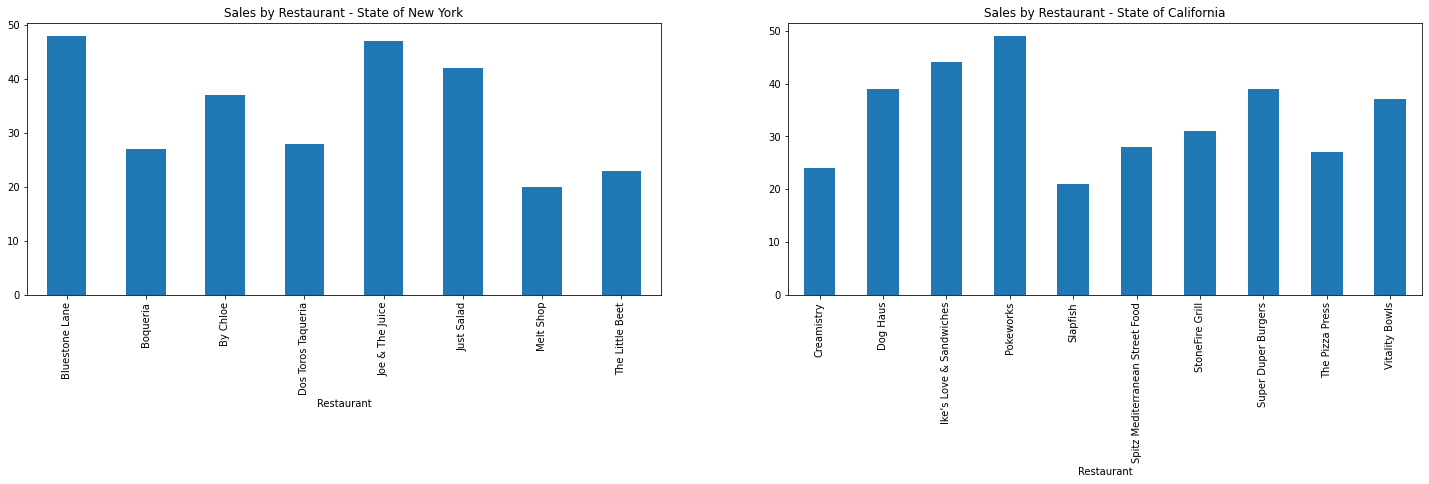

In [10]:
fig, axs = plt.subplots(4,figsize=(25,5))

plt.subplot(1,2,1)
future[future['State'] == 'N.Y.'].groupby('Restaurant').Sales.sum().plot(kind='bar').set_title('Sales by Restaurant - State of New York')
plt.subplot(1,2,2)
future[future['State'] == 'Calif.'].groupby('Restaurant').Sales.sum().plot(kind='bar').set_title('Sales by Restaurant - State of California')

fig.show()

<ipython-input-11-460760bcc9dc>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


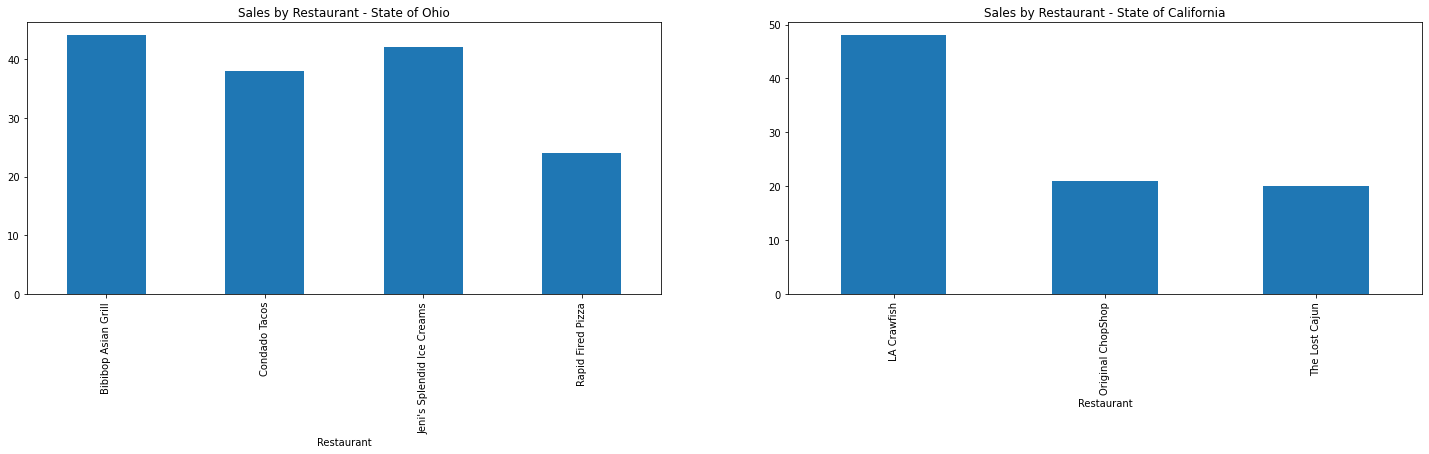

In [11]:
fig, axs = plt.subplots(4,figsize=(25,5))

plt.subplot(1,2,1)
future[future['State'] == 'Ohio'].groupby('Restaurant').Sales.sum().plot(kind='bar').set_title('Sales by Restaurant - State of Ohio')
plt.subplot(1,2,2)
future[future['State'] == 'Texas'].groupby('Restaurant').Sales.sum().plot(kind='bar').set_title('Sales by Restaurant - State of California')

fig.show()

In [12]:
independence = pd.read_csv('/Users/sachinim/Documents/Projects/Sales Prediction Project/Sales Prediction Dataset/Independence100.csv')
independence.head()

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0


In [13]:
independence.isnull().sum()

Rank             0
Restaurant       0
Sales            0
Average Check    0
City             0
State            0
Meals Served     0
dtype: int64

In [14]:
colors5 = []

for i in independence.groupby(['City','State']).Sales.mean():
  if i > independence.groupby(['City','State']).Sales.mean().mean():
    colors5.append('lightgreen')
  else:
    colors5.append('lightblue')

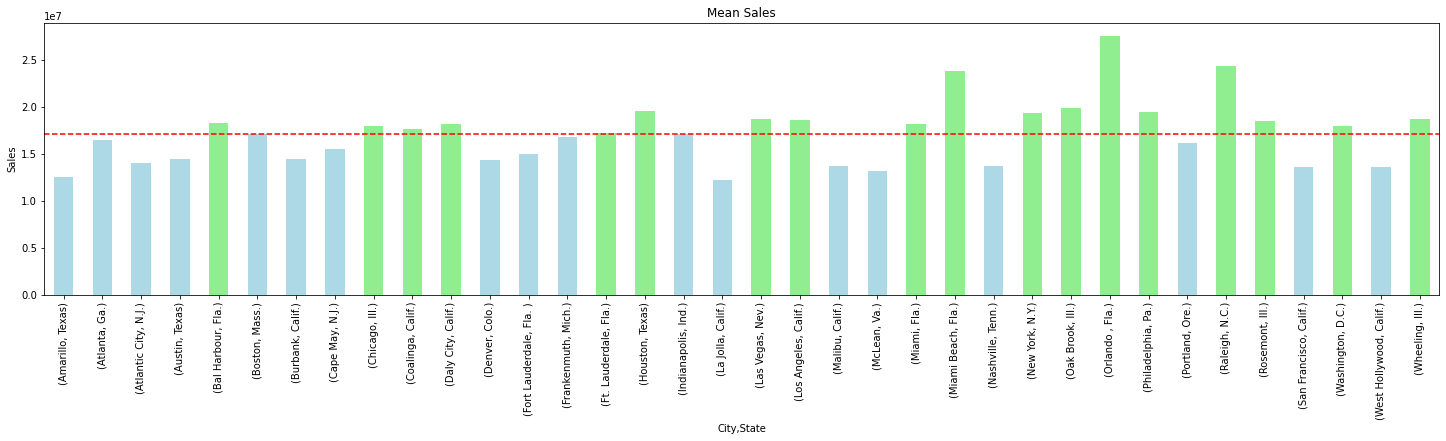

In [15]:
plt.subplots(figsize=(25,5))
independence.groupby(['City','State']).Sales.mean().plot(kind='bar', color=colors5, ylabel='Sales').set_title("Mean Sales")
plt.axhline(independence.groupby(['City','State']).Sales.mean().mean(), ls='--', color='red')
plt.show()

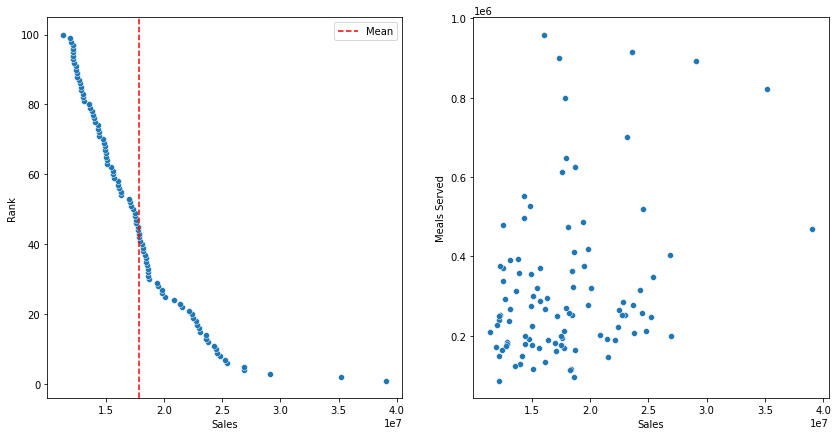

In [16]:
# Create Machine Learning Model

plt.subplots(figsize=(14,7))

plt.subplot(1,2,1)
sns.scatterplot(x=independence.Sales, y=independence.Rank)
plt.axvline(independence.Sales.mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x=independence.Sales, y=independence['Meals Served'])

plt.show()

<AxesSubplot:>

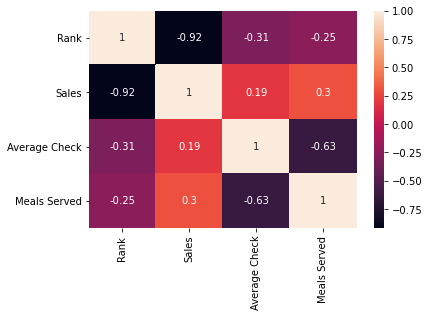

In [17]:
sns.heatmap(independence.corr(), annot=True)

In [18]:
# Predict Slaes Using Random Forest Classifier

x = independence.drop(['Restaurant','Sales','City','State'], axis=1)
y = independence['Sales']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

predicao = forest.predict(x_test)

print('MAE:', mean_absolute_error(y_test, predicao))
print('MSE:', mean_squared_error(y_test, predicao))
print("R²:", r2_score(y_test, predicao))

MAE: 653854.0910000001
MSE: 2089497188617.1375
R²: 0.9116840735375007


In [20]:
print('True values:', y_test.mean())
print("Prediction values:", predicao.mean())
print('Mean difference:', y_test.mean() - predicao.mean())

True values: 18188443.35
Prediction values: 18821325.468000002
Mean difference: -632882.1180000007


In [21]:
top = pd.read_csv('/Users/sachinim/Documents/Projects/Sales Prediction Project/Sales Prediction Dataset/Top250.csv')
top.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [22]:
top.shape

(250, 9)

In [23]:
top.isnull().sum()

Rank                  0
Restaurant            0
Content             217
Sales                 0
YOY_Sales             0
Units                 0
YOY_Units             0
Headquarters        198
Segment_Category      0
dtype: int64

In [24]:
top.drop(['Content','Headquarters','Restaurant'], axis=1, inplace=True)

In [25]:
top['Segment_Category'].value_counts()

Varied Menu                        22
Mexican                            14
Quick Service & Burger             13
Burger                             10
Family Style                       10
Italian/Pizza                      10
Pizza                               9
Steak                               9
Casual Dining & Varied Menu         9
Bakery Cafe                         8
Quick Service & Pizza               8
Seafood                             8
BBQ                                 7
Family Dining & Family Style        7
Sandwich                            7
Chicken                             7
Quick Service & Chicken             6
Sports Bar                          6
Fast Casual & Sandwich              6
Frozen Desserts                     4
Quick Service & Coffee Cafe         4
Fast Casual & Chicken               4
Snack                               4
Quick Service & Sandwich            4
Fast Casual & Burger                4
Casual Dining & Italian/Pizza       4
Family Casua

<ipython-input-26-eca2cf76fe0f>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


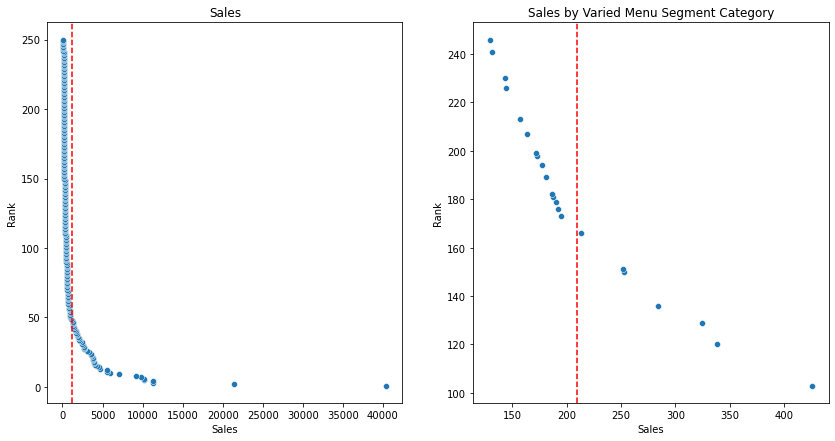

In [26]:
plt.subplots(figsize=(14,7))

plt.subplot(1,2,1)
sns.scatterplot(x=top['Sales'], y=top['Rank']).set_title('Sales')
plt.axvline(top['Sales'].mean(), ls='--', color='red')

plt.subplot(1,2,2)
sns.scatterplot(x=top[top['Segment_Category'] == 'Varied Menu'].Sales, y=top[top['Segment_Category'] == 'Varied Menu'].Rank).set_title('Sales by Varied Menu Segment Category')
plt.axvline(top[top['Segment_Category'] == 'Varied Menu'].Sales.mean(), ls='--', color='red')

fig.show()

In [27]:
top['YOY_Sales'] = top['YOY_Sales'].apply(lambda x: x.replace('%', ""))
top['YOY_Units'] = top['YOY_Units'].apply(lambda x: x.replace("%", ""))

top['YOY_Sales'] = top['YOY_Sales'].astype('float')
top['YOY_Units'] = top['YOY_Units'].astype('float')

top.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,40412,4.9,13846,-0.5,Quick Service & Burger
1,2,21380,8.6,15049,3.0,Quick Service & Coffee Cafe
2,3,11320,13.0,2470,5.0,Quick Service & Chicken
3,4,11293,9.0,6766,2.7,Quick Service & Mexican
4,5,10204,2.7,7346,0.2,Quick Service & Burger


<AxesSubplot:>

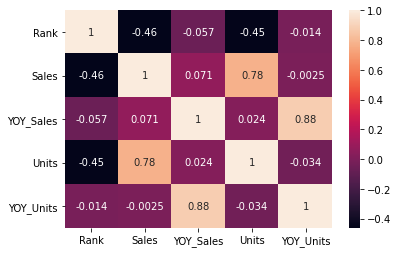

In [28]:
sns.heatmap(top.corr(), annot=True)

In [29]:
dummie = pd.get_dummies(top['Segment_Category'])
top.drop("Segment_Category", axis=1, inplace=True)
top = pd.concat((top, dummie), axis=1)

top.head()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Asian,Asian/Noodle,BBQ,Bakery Cafe,Burger,...,Quick Service & Pizza,Quick Service & Sandwich,Quick Service & Seafood,Quick Service & Snack,Sandwich,Seafood,Snack,Sports Bar,Steak,Varied Menu
0,1,40412,4.9,13846,-0.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,21380,8.6,15049,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,11320,13.0,2470,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,11293,9.0,6766,2.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10204,2.7,7346,0.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
x = top.drop('Sales', axis=1)

y = top['Sales']


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

predicao2 = forest.predict(x_test)

print("MSE:", mean_squared_error(y_test, predicao2))
print("MAE:", mean_absolute_error(y_test, predicao2))
print("R²:", r2_score(y_test, predicao2))

MSE: 1858214.5067920005
MAE: 244.8528
R²: 0.4266602545013032


In [32]:
print('True value:', y_test.mean())
print('Prediction:', predicao2.mean())

True value: 884.44
Prediction: 1128.3056000000001
